In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation

In [2]:
spark = SparkSession.builder.getOrCreate()

In [4]:
df = spark.read.csv("house_price _corr.csv", inferSchema=True, header=True)

In [5]:
df.show()

+-----------+-----------+---------+----------+---------+
|OverallQual|OverallCond|GrLivArea|GarageArea|SalePrice|
+-----------+-----------+---------+----------+---------+
|          7|          5|     1710|       548|   208500|
|          6|          8|     1262|       460|   181500|
|          7|          5|     1786|       608|   223500|
|          7|          5|     1717|       642|   358736|
|          8|          5|     2198|       836|   553963|
|          5|          5|     1362|       480|   143000|
|          8|          5|     5936|       636|   307000|
|          7|          6|     6346|       484|   200000|
|          7|          5|     1774|       468|   129900|
|          5|          6|     1077|       205|   118000|
|          5|          5|     1040|       384|   129500|
|          9|          5|     2324|       346|   345000|
|          5|          4|      912|       734|   144000|
|          7|          7|     1494|       454|   279500|
|          6|          5|     1

In [6]:
df.printSchema()

root
 |-- OverallQual: integer (nullable = true)
 |-- OverallCond: integer (nullable = true)
 |-- GrLivArea: integer (nullable = true)
 |-- GarageArea: integer (nullable = true)
 |-- SalePrice: integer (nullable = true)



In [7]:
df.corr("OverallQual", "SalePrice")

0.7088680571901927

In [8]:
df.corr("GrLivArea", "SalePrice")

0.3178067172984518

In [9]:
df.corr("GarageArea", "SalePrice")

0.5053657033548684

In [10]:
df.corr("SalePrice", "SalePrice")

1.0

In [11]:
from pyspark.ml.feature import VectorAssembler

In [12]:
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=df.columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

In [13]:
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)

[[1.0, -0.02774753460233952, 0.4573644491898405, 0.20120788591271033, 0.7088680571901929], [-0.02774753460233952, 1.0, -0.1248672533677727, -0.25121753977210914, -0.20552834539920514], [0.4573644491898405, -0.1248672533677727, 1.0, 0.1472812727140397, 0.31780671729845184], [0.20120788591271033, -0.25121753977210914, 0.1472812727140397, 1.0, 0.5053657033548684], [0.7088680571901929, -0.20552834539920514, 0.31780671729845184, 0.5053657033548684, 1.0]]


In [14]:
df.columns

['OverallQual', 'OverallCond', 'GrLivArea', 'GarageArea', 'SalePrice']

In [15]:
columns = ['OverallQual', 'GrLivArea', 'GarageArea', 'SalePrice']

In [16]:
df_corr = spark.createDataFrame(corrmatrix,columns)
df_corr.show()

+--------------------+--------------------+-------------------+--------------------+--------------------+
|         OverallQual|           GrLivArea|         GarageArea|           SalePrice|                  _5|
+--------------------+--------------------+-------------------+--------------------+--------------------+
|                 1.0|-0.02774753460233952| 0.4573644491898405| 0.20120788591271033|  0.7088680571901929|
|-0.02774753460233952|                 1.0|-0.1248672533677727|-0.25121753977210914|-0.20552834539920514|
|  0.4573644491898405| -0.1248672533677727|                1.0|  0.1472812727140397| 0.31780671729845184|
| 0.20120788591271033|-0.25121753977210914| 0.1472812727140397|                 1.0|  0.5053657033548684|
|  0.7088680571901929|-0.20552834539920514|0.31780671729845184|  0.5053657033548684|                 1.0|
+--------------------+--------------------+-------------------+--------------------+--------------------+



In [17]:
df.columns

['OverallQual', 'OverallCond', 'GrLivArea', 'GarageArea', 'SalePrice']

In [18]:
df_corr.select('GrLivArea', 'GarageArea', 'SalePrice').show()

+--------------------+-------------------+--------------------+
|           GrLivArea|         GarageArea|           SalePrice|
+--------------------+-------------------+--------------------+
|-0.02774753460233952| 0.4573644491898405| 0.20120788591271033|
|                 1.0|-0.1248672533677727|-0.25121753977210914|
| -0.1248672533677727|                1.0|  0.1472812727140397|
|-0.25121753977210914| 0.1472812727140397|                 1.0|
|-0.20552834539920514|0.31780671729845184|  0.5053657033548684|
+--------------------+-------------------+--------------------+



In [19]:
import seaborn as sns

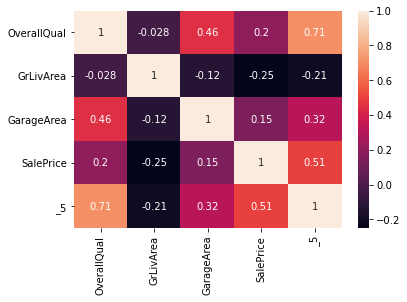

In [23]:
sns.heatmap(corrmatrix, xticklabels=df_corr.columns, 
           yticklabels=df_corr.columns, annot=True)